# NYC Taxi and Limousine Commission (TLC) Trips Exploratory Data Analysis

Nidhi Bendre

The NYC Taxi and Limousine Commission (TLC) routinely collects trip data from all licensed cabs in NY. This data can be used in the future to understand how New Yorkers use these taxis. 

**Data & Documentation**

- **Data Source:** https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2020-02.parquet
- **Data Dictionary:** [Green Trips Data Dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf).

The TLC trip record data and a description of the initiative can be found at the following link: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [1]:
#run this cell to install the fast parquet library
!pip install fastparquet

In [2]:
#import libraries
import pandas as pd

## 1. Load the data

In [3]:
tripdata_df = pd.read_parquet(path = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2020-02.parquet', #provide the URL to the data source
                      engine = 'fastparquet')

tripdata_df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2020-02-01 00:10:25,2020-02-01 00:14:34,N,1.0,74,41,1.0,0.76,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.0
1,2,2020-02-01 00:16:59,2020-02-01 00:21:35,N,1.0,74,74,1.0,0.72,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,1.0,1.0,0.0
2,2,2020-02-01 00:19:31,2020-02-01 00:25:29,N,1.0,223,7,1.0,0.89,6.0,0.5,0.5,1.82,0.0,NaN,0.3,9.12,1.0,1.0,0.0
3,2,2020-02-01 00:43:52,2020-02-01 00:48:58,N,1.0,145,145,1.0,1.12,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
4,2,2020-02-01 00:32:53,2020-02-01 00:35:19,N,1.0,166,166,1.0,0.65,4.0,0.5,0.5,1.06,0.0,NaN,0.3,6.36,1.0,1.0,0.0


## 2. Inspect the Data

In [4]:
# use shape to get dimensions
# use info() to check variable types
tripdata_df.shape, tripdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398632 entries, 0 to 398631
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               398632 non-null  int64         
 1   lpep_pickup_datetime   398632 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  398632 non-null  datetime64[ns]
 3   store_and_fwd_flag     317739 non-null  object        
 4   RatecodeID             317739 non-null  float64       
 5   PULocationID           398632 non-null  int64         
 6   DOLocationID           398632 non-null  int64         
 7   passenger_count        317739 non-null  float64       
 8   trip_distance          398632 non-null  float64       
 9   fare_amount            398632 non-null  float64       
 10  extra                  398632 non-null  float64       
 11  mta_tax                398632 non-null  float64       
 12  tip_amount             398632 non-null  floa

((398632, 20), None)

The data has 20 columns and 398632 observations.
For the data types, all variables have suitable data types (time columns are datetime64 and other quantitative data is represented as ints or floats) except the store_and_fwd_flag variable which is an object when it should be a string as it contains "yes" or "no" values. 

## 3. Missing Values

In [5]:
# use isnull() and sum() to see all null values across all columns
tripdata_df.isnull().sum()

VendorID                      0
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
store_and_fwd_flag        80893
RatecodeID                80893
PULocationID                  0
DOLocationID                  0
passenger_count           80893
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
ehail_fee                398632
improvement_surcharge         0
total_amount                  0
payment_type              80893
trip_type                 80894
congestion_surcharge      80893
dtype: int64

In [6]:
# use isnull() and axis of 1 to see null values across rows
tripdata_df.isnull().sum(axis=1).sort_values(ascending = False)

398631    7
344706    7
344699    7
344700    7
344701    7
         ..
132875    1
132874    1
132873    1
132872    1
199316    1
Length: 398632, dtype: int64

From the above information we can conclude that the values for ehail_fee column are null across the data as the null sum is equal to the number of rows in the dataframe. Because of this, the ehail_fee column can be removed as a whole. As for the other columns with null values, the null value sum are all the same which can indicate that those values are missing from the same rows. This is further supported by the null values sum across rows where we can see that some observations have 7 missing values (same number of columns with null values). So these rows can be gotten rid of as well.  

## 4. Types of Data

There is categorical data in this dataframe. 

One variable that is categorical is RatecodeID which is the final rate code in effect at the end of the trip. The type of this variable is integer, but each number represents a separate category: 1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, and 6=Group ride. RatecodeID is nominal data. 

Another categorical variable is Store_and_fwd_flag that indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. The categories for this are Y= store and forward trip and N= not a store and forward trip. Store_and_fwd_flag is nominal data.

## 5. Invalid Data

In [7]:
tripdata_df['VendorID'].value_counts(dropna=False) 

2    345899
1     52704
6        29
Name: VendorID, dtype: int64

<b>Issue #1:</b> VendorID, according to the data dictionary, is supposed to have only 2 categories, 1= Creative Mobile Technologies and LLC; 2= VeriFone Inc. According to the data shown above, there seems to be some entries with a vendor ID of 6, which does not correlate to any vendor. 

In [8]:
tripdata_df['RatecodeID'].value_counts(dropna=False) 

1.0     309477
NaN      80893
5.0       7246
2.0        620
4.0        263
3.0        130
99.0         2
6.0          1
Name: RatecodeID, dtype: int64

<b>Issue #2:</b> RatecodeID, according to the data dictionary, is supposed to have 6 categories, 1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, and 6=Group ride. According to the data shown above, there seems to be some entries with a rate code ID of 99, which does not match to any rate. 

In [9]:
tripdata_df['passenger_count'].value_counts(dropna=False)

1.0    273447
NaN     80893
2.0     23121
5.0      9178
3.0      4927
6.0      4809
4.0      1775
0.0       465
7.0         9
8.0         8
Name: passenger_count, dtype: int64

<b>Issue #3:</b> the passenger count for some trips is 0, which shouldn't count as a trip if there are no passengers. 

## 6. Data Preparation

In [10]:
# convert object type to string in store_and_fwd_flag variable
tripdata_df['store_and_fwd_flag'] = tripdata_df['store_and_fwd_flag'].astype('string')
tripdata_df['store_and_fwd_flag']

0            N
1            N
2            N
3            N
4            N
          ... 
398627    <NA>
398628    <NA>
398629    <NA>
398630    <NA>
398631    <NA>
Name: store_and_fwd_flag, Length: 398632, dtype: string

In [11]:
# remove observations with missing values
# ehail_fee column can be dropped as all values are missing
tripnew_df = tripdata_df.drop(columns = ['ehail_fee'])

# for other rows with multiple null values, there were multiple rows with 7 missing values
# as one of those columns is dropped, for the rest, any observations with 6 or more values can be dropped
tripnew_df = tripnew_df[tripnew_df.isnull().sum(axis=1) < 6]

tripnew_df.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                1
congestion_surcharge     0
dtype: int64

When getting rid of data, first the ehail column is removed entirely as all values in this column were missing. Additionally, all rows with missing data in 6 or more columns can be dropped. Lastly, we are left with 1 null value in the trip_type column that can be inspected.

In [12]:
tripnew_df.loc[tripnew_df['trip_type'].isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
24243,1,2020-02-03 11:19:29,2020-02-03 11:19:29,N,99.0,264,264,0.0,0.0,23.0,0.0,0.0,4.7,0.0,0.3,28.0,1.0,NaN,0.0


even though this value is none, it can be left alone for now as the RatecodeID is 99, so this row will be dropped in the next step

In [13]:
# remove values with vendorID of 6
# remove values with rateID of 99
# remove passenger_count of 0

for index, row in tripnew_df.iterrows():
    if row['VendorID'] == 6 or row['RatecodeID'] == 99 or row['passenger_count'] == 0:
        tripnew_df = tripnew_df.drop(index)

tripnew_df['VendorID'].value_counts(dropna=False), tripnew_df['RatecodeID'].value_counts(dropna=False), tripnew_df['passenger_count'].value_counts(dropna=False)


(2    264962
 1     52311
 Name: VendorID, dtype: int64,
 1.0    309087
 5.0      7172
 2.0       620
 4.0       263
 3.0       130
 6.0         1
 Name: RatecodeID, dtype: int64,
 1.0    273446
 2.0     23121
 5.0      9178
 3.0      4927
 6.0      4809
 4.0      1775
 7.0         9
 8.0         8
 Name: passenger_count, dtype: int64)

in addition to the issues identified in previous questions, another invalid data in the dataframe is negative total amounts which shouldn't exist as if a trip is taken, then they should be charged an instance where negative data can work is if the passenger was refunded the money, but for analysis purposes, rows with negative totals can be dropped as well.

In [14]:
tripnew_df = tripnew_df[tripnew_df['total_amount'] >= 0]
tripnew_df.loc[tripnew_df['total_amount'] < 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


## 7. Data Analysis

In [15]:
# to find the most expensive trip, the index at which the highest total_amount occurs is found
max_index = tripnew_df['total_amount'].idxmax()

# the index is then used to locate the lowest total_amount and the distance associated with it
tripnew_df.loc[max_index]


VendorID                                   1
lpep_pickup_datetime     2020-02-07 16:15:33
lpep_dropoff_datetime    2020-02-07 16:27:18
store_and_fwd_flag                         N
RatecodeID                               1.0
PULocationID                              25
DOLocationID                              97
passenger_count                          1.0
trip_distance                            1.1
fare_amount                              8.5
extra                                    1.0
mta_tax                                  0.5
tip_amount                             641.2
tolls_amount                             0.0
improvement_surcharge                    0.3
total_amount                           651.5
payment_type                             1.0
trip_type                                1.0
congestion_surcharge                     0.0
Name: 71544, dtype: object

The most expensive trip costed 651.5 and the distance covered was 1.1 miles. Even though the base fare amount was 8.5 dollars, the passenger tipped the driver 641.2 dollars that caused the trip to be so expensive for such a short ride.

In [16]:
# for the least expensive trip many trips have a total of 0 that have covered various distances
# as I didn't account for this earlier, rows with total_amount of 0 can be disregarded
tripnew_df = tripnew_df[tripnew_df['total_amount'] != 0]

# the index with the lowest total_amount is found
min_index = tripnew_df['total_amount'].idxmin()

# index is used to locate the lowest total_amount and the distance associated with it
tripnew_df.loc[min_index]

VendorID                                   1
lpep_pickup_datetime     2020-02-05 05:43:21
lpep_dropoff_datetime    2020-02-05 05:56:09
store_and_fwd_flag                         N
RatecodeID                               5.0
PULocationID                             220
DOLocationID                             235
passenger_count                          1.0
trip_distance                            2.8
fare_amount                             0.01
extra                                    0.0
mta_tax                                  0.0
tip_amount                               0.0
tolls_amount                             0.0
improvement_surcharge                    0.0
total_amount                            0.01
payment_type                             2.0
trip_type                                2.0
congestion_surcharge                     0.0
Name: 42264, dtype: object

The least expensive trip costed 0.01 dollars and traveled a distance of 2.8 miles. Even though this trip covered more distance than the most expensive trip, it only costed 1 cent and there was no extra or tax. From this we can infer that this trip was perhaps a test run of some sorts which is why it wasn't charged fully.

## 8. Data Visualization

In [17]:
tripnew_df.shape

(315280, 19)

<Axes: title={'center': "Ways New Yorker's hail a cab"}, xlabel='trip type', ylabel='Count'>

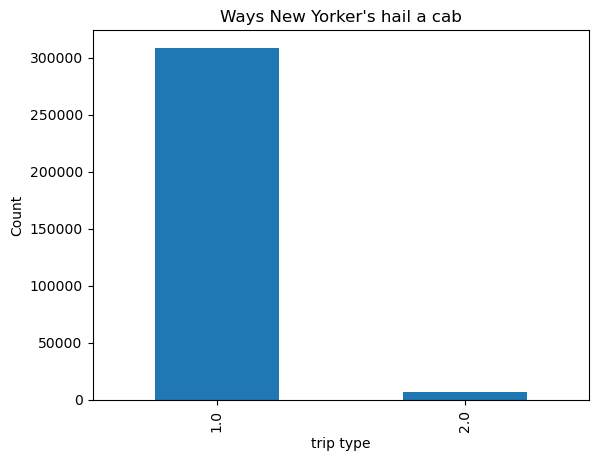

In [18]:
tripnew_df['trip_type'].value_counts().plot(kind='bar', 
                                            title = "Ways New Yorker's hail a cab", 
                                            xlabel="trip type", 
                                            ylabel="Count")


Trip type is a code indicating whether the trip was a street-hail or a dispatch that is automatically assigned. 1 represents street-hail and 2 represents dispatch. From the bar chart above, it is clear that street hail is the most common way New Yorkers request a cab compared to a dispatch. 

<Axes: title={'center': 'Top 5 Drop off Location IDs'}, xlabel='Location ID', ylabel='Count'>

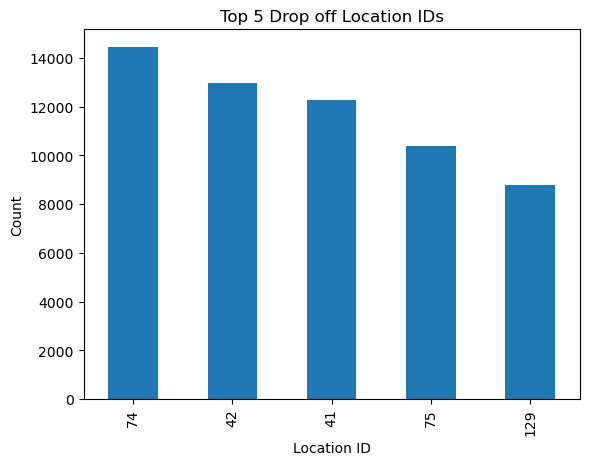

In [19]:
top5 = tripnew_df['DOLocationID'].value_counts().head(5)
top5.plot(kind='bar',
         title = "Top 5 Drop off Location IDs", 
          xlabel="Location ID", 
          ylabel="Count")

The above bar chart shows the top 5 most common drop-off location ids, which is the TLC Taxi Zone in which the taximeter was disengaged. Upon further research, the location IDs correspond to these locations: the most common drop-off location is East Harlem North, second is Central Harlem North, third is Central Harlem, next is East Harlem South, and last is Jackson Heights. This data makes sense as many people probably take a train to Harlem (which is a popular area in Manhattan) and they would probably hail a cab to get around. Additionally, there are a bunch of colleges in this area, so it increases traffic.

## 9. Findings

Based on the analysis conducted so far, this data many not be the most vaiable source to understand how New Yorkers use these taxis. Firstly, this data had a lot of missing values that needed to be shaved off, which reduced the size of the dataframe. Additionally, it also contained a lot of invalid data that also had to be dropped. Because of the poor quality of data, it would require a lot of cleaning in order for it to be actually useful. Even then, too much data would be lost which would lower the accuracy of the results. 